In [1]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('height.csv')
df.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [2]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

<AxesSubplot:xlabel='Height', ylabel='Count'>

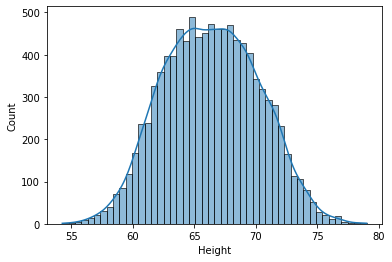

In [3]:
sns.histplot(df.Height,kde=True)

In [4]:
mean = df.Height.describe()['mean']
std = df.Height.describe()['std']

In [5]:
mean-3*std

54.824975392479274

In [6]:
mean+3*std

77.91014411725271

In [7]:
df[ (df.Height < 54.82497539250156) | (df.Height > 77.91014411714093)]

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


In [8]:
df_outlier_no = df[ (df.Height > 54.82497539250156) & (df.Height < 77.91014411714093)]
df_outlier_no.shape
# df_outlier_no.describe()
df_outlier_no.Height.describe()

count    9993.000000
mean       66.363856
std         3.835511
min        54.873728
25%        63.505894
50%        66.317755
75%        69.169353
max        77.547186
Name: Height, dtype: float64

<AxesSubplot:ylabel='Count'>

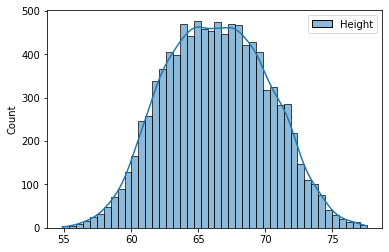

In [9]:
sns.histplot(df_outlier_no,kde=True)

In [10]:
df_outlier_no_mean = df_outlier_no.Height.describe()['mean']
df_outlier_no_std = df_outlier_no.Height.describe()['std']
z_score = [(i-df_outlier_no_mean)/df_outlier_no_std for i in df_outlier_no.Height]
z_score

[1.9510205344349816,
 0.630437005235663,
 2.0196133121684077,
 1.3993239058952924,
 0.9172023778522642,
 0.23182303588118433,
 0.631265369383479,
 0.5174433225562155,
 0.17079700432101055,
 -0.7580115577732255,
 1.2596825161446006,
 1.375813798806431,
 -0.41650945598371203,
 0.7611017376797045,
 0.7508455117073585,
 0.3341833173150659,
 1.5785277165315286,
 -0.6230017226933514,
 0.8541766311252006,
 0.4098929507399016,
 0.404429621684879,
 0.8018706887277366,
 -0.05598311585191265,
 2.305329648620618,
 0.39873185452143667,
 0.46413029668069744,
 0.7106681297769314,
 1.6782606767639696,
 0.27568331407106467,
 0.5560039838954337,
 0.5877325286383909,
 1.9997208479778934,
 1.3464594121429299,
 0.7342711553785226,
 0.8377883256133978,
 1.0525514871301453,
 0.7071587514550608,
 0.21631208928952747,
 -0.14510195518901167,
 -0.536999583908294,
 0.4198867631937004,
 1.5188510122645726,
 -0.28510157880056897,
 -0.07135383863341668,
 0.29890818147961884,
 0.9753407552495147,
 0.4922370165534692,

In [13]:
df['z_score'] = (df_outlier_no.Height-df_outlier_no.Height.describe()['mean'])/df_outlier_no.Height.describe()['std']
df['z_score']

0       1.951021
1       0.630437
2       2.019613
3       1.399324
4       0.917202
          ...   
9995   -0.049851
9996    0.183365
9997   -0.650725
9998    0.696227
9999   -1.152287
Name: z_score, Length: 10000, dtype: float64

In [20]:
df[(df['z_score'] >= -3)|(df['z_score'] <= 3)]
## sameAs
## df[(df.z_score >= -3)|(df.z_score <= 3)]

,Gender,Height,z_score
0,Male,73.847017,1.951021
1,Male,68.781904,0.630437
2,Male,74.110105,2.019613
3,Male,71.730978,1.399324
4,Male,69.881796,0.917202
...,...,...,...
9995,Female,66.172652,-0.049851
9996,Female,67.067155,0.183365
9997,Female,63.867992,-0.650725
9998,Female,69.034243,0.696227


In [21]:
df[(df['z_score'] >= -3)|(df['z_score'] <= 3)].shape

(9993, 3)